
#  Основы PyTorch

## Введение

Материал предназначен для краткого введения в основы PyTorch и подготовки для написания собственных нейронных сетей.

PyTorch — это платформа для раработки методов машинного обучения с открытым исходным кодом, которая позволяет вам писать собственные НС. PyTorch — не единственная платформа такого рода. Существующие альтернативы PyTorch — TensorFlow, JAX.

Здесь будут показаны основы, необходимые для выполнения практических занятий, позволяющие понять как PyTorch работает «под капотом».

Мы будем использовать набор стандартных библиотек, которые часто используются в проектах машинного обучения.



In [3]:
## Стандартные библиотеки
import os
import math
import numpy as np
import time

## Импорты для графиков
import matplotlib.pyplot as plt
%matplotlib inline

# Замените устаревший метод на новый
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export

from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Библиотека для отображения прогресс-бара
from tqdm.notebook import tqdm


# Основы

Начнем с основных концепций PyTorch. В качестве предварительного условия рекомендуется ознакомиться с пакетом `numpy`, поскольку большинство фреймворков машинного обучения основаны на очень похожих концепциях.

Если вы еще не знакомы с numpy, не волнуйтесь: вот [руководство](https://numpy.org/devdocs/user/quickstart.html), с которым стоит ознакомиться.

Итак, начнем с импорта PyTorch. Пакет называется `torch` и основан на оригинальном фреймворке Torch.

Проверяем его версию:

In [4]:
import torch
print("Using torch", torch.__version__)

Using torch 2.4.1


Как и в любом фреймворке машинного обучения, PyTorch предоставляет стохастические функции, такие как генерация случайных чисел. Классической практикой является настройка воспроизводимости вашего кода с одинаковыми случайными числами. Вот почему мы установили параметр `seed` ниже.

In [5]:
torch.manual_seed(42) # Setting the seed

In [9]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[5.8395e-34, 1.4503e-42, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])


`torch.Tensor` выделяет память для нужного тензора, но повторно использует любые значения, которые уже были в памяти. Чтобы напрямую присвоить значения тензору во время инициализации, существуют альтернативы, в том числе:

* `torch.zeros`: Создает тензор, заполненный нулями.
* `torch.ones`: Создает тензор, заполненный единицами.
* `torch.rand`: Создает тензор со случайными значениями, равномерно выбранными от 0 до 1.
* `torch.randn`: Создает тензор со случайными значениями, выбранными из нормального распределения со средним значением 0 и дисперсией 1.
* `torch.arange`: Создает тензор, содержащий значения $N,N+1,N+2,...,M$
* `torch.Tensor` (входной список): создает тензор из предоставленных вами элементов списка.

In [10]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [11]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


Получить форму тензора можно так же, как в numpy (`x.shape`), или используя метод `.size`:

In [12]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Тензор в Numpy и Numpy в Тензор

Тензоры можно преобразовать в массивы numpy, а массивы numpy обратно в тензоры. Чтобы преобразовать массив numpy в тензор, мы можем использовать функцию torch.from_numpy:

In [13]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


Чтобы преобразовать тензор PyTorch обратно в массив numpy, мы можем использовать функцию `.numpy()` для тензоров:

In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

Преобразование тензоров в numpy требует, чтобы тензор находился на ЦПУ, а не на графическом процессоре.
Если у вас есть тензор на графическом процессоре, вам необходимо заранее вызвать .cpu() для тензора. Следовательно, получится строка вида `np_arr = tensor.cpu().numpy()`.

#### Операции

Большинство операций, существующих в numpy, также существуют и в PyTorch. Полный список операций можно найти в [документации PyTorch](https://pytorch.org/docs/stable/tensors.html#), но здесь мы рассмотрим наиболее важные из них.

Самая простая операция — сложить два тензора:

In [15]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
Y tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


Вызов `x1 + x2` создает новый тензор, содержащий сумму двух входных данных. Однако мы также можем использовать операции на месте, которые применяются непосредственно к памяти тензора. Поэтому мы изменяем значения `x2` без возможности повторного доступа к значениям `x2` перед операцией. Пример показан ниже:

In [18]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5315, 0.1587, 0.6542],
        [0.3278, 0.6532, 0.3958]])
X2 (before) tensor([[0.9147, 0.2036, 0.2018],
        [0.2018, 0.9497, 0.6666]])
X1 (after) tensor([[0.5315, 0.1587, 0.6542],
        [0.3278, 0.6532, 0.3958]])
X2 (after) tensor([[1.4462, 0.3624, 0.8560],
        [0.5296, 1.6029, 1.0625]])


Операции на месте обычно отмечаются постфиксом подчеркивания (например, «add_» вместо «add»).

Другая распространенная операция направлена на изменение формы тензора. Тензор размера (2,3) можно реорганизовать в любую другую форму с тем же количеством элементов (например, тензор размера (6) или (3,2),...). В PyTorch этo операция  `view`:

In [19]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [20]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [21]:
x = x.permute(1, 0) # Переставляем размерность
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Другие часто используемые операции включают умножение матриц, которые необходимы для нейронных сетей. Например, у нас есть входной вектор $\mathbf{x}$, который преобразуется с использованием весовой матрицы $\mathbf{W}$. Существует множество способов и функций для умножения матриц, некоторые из которых:

* `torch.matmul`: матричное произведение двух тензоров, где конкретное поведение зависит от размеров. Если оба входа являются матрицами (двумерными тензорами), он выполняет стандартное матричное произведение. Для входных данных более высокой размерности функция поддерживает broadcasting ( термин, описывающий способность фреймворка производить арифметические операции над массивами различной размерности) (подробности см. в [документации](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Произведение может записано как `a @ b`, аналогично numpy.
* `torch.mm`: выполняет матричное произведение двух матриц, но не поддерживает broadcasting (см. [документацию](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: вычисляет произведение с доп.  размерностью. Если первый тензор $T$ имеет форму ($b\times n\times m$), а второй тензор $R$ ($b\times m\times p$), выходной $O$ имеет форму ( $b\times n\times p$) и вычисляется путём $b$ матричного умножения подматриц $T$ и $R$: $O_i = T_i @ R_i$
* `torch.einsum`: выполняет матричные умножения и другие операции (т.е. суммы произведений), используя конв-ю Эйнштейна о суммировании.

Чаще в обихо идет torch.matmul или torch.bmm. Попробуем умножить матрицу с помощью torch.matmul ниже.

In [22]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [23]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [24]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Индексирование

Часто возникают ситуации, когда нам нужно выделить часть тензора. Индексирование работает так же, как и в numpy, поэтому давайте попробуем:

In [25]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [26]:
print(x[:, 1])   # второй столбец

tensor([1, 5, 9])


In [27]:
print(x[0])      # первая строка

tensor([0, 1, 2, 3])


In [28]:
print(x[:2, -1]) # первые две строки, последний столбец

tensor([3, 7])


In [29]:
print(x[1:3, :]) # две строки посередине

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Динамический вычислительный граф и  обратное распространение ошибки

Одна из основных причин использования PyTorch в проектах глубокого обучения заключается в том, что мы можем автоматически получать **градиенты/производные** функций, которые мы определяем. Если мы используем матрицы весов в нашей функции, которую хотим изучить, то они называются **параметрами** или просто **весами**.

Если бы наша нейронная сеть выдавала одно скалярное значение, мы бы говорили о взятии **производной**, но чаще будет **множество** выходных переменных («значений»); в этом случае мы говорим о **градиентах**. Это более общий термин.

Учитывая входные данные $\mathbf{x}$, мы определяем нашу функцию,  выполняя различные операции над  этими входными данными, обычно путем умножения на весовые матрицы и сложения с так называемыми векторами смещения (bias).
Производя вычисления на входными данными, мы автоматически создаем **вычислительный граф**. В графе показано, как получается результат на основе входных данных.
PyTorch — это **фреймворк, определяемый при запуске**; т.е. что мы можем просто выполнять свои манипуляции, а PyTorch будет отслеживать этот граф для нас. Таким образом, мы попутно создаем динамический граф вычислений.

Первое, что нам нужно сделать, это указать, какие тензоры требуют градиентов. По умолчанию, когда мы создаем тензор, он не требует градиентов.

In [30]:
x = torch.ones((3,))
print(x.requires_grad)

False


Мы можем изменить это для существующего тензора, используя функцию `requires_grad_()` (подчеркивание указывает, что это in-place операция). Альтернативно, при создании тензора вы можете передать аргумент `requires_grad=True` большинству инициализаторов, которые мы видели выше.

In [31]:
x.requires_grad_(True)
print(x.requires_grad)

True


Чтобы ознакомиться с концепцией графа вычислений, мы создадим его для следующей функции:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

где мы используем $\ell(x)$ для обозначения количества элементов в $x$. Другими словами, здесь мы берем среднее значение по операции внутри суммы. Вы можете представить, что $x$ — это наши параметры, и мы хотим оптимизировать (максимизировать или минимизировать) выходные данные $y$. Для этого мы хотим получить градиенты $\partial y/\partial \mathbf{x}$. В нашем примере мы будем использовать $\mathbf{x}=[0,1,2]$ в качестве входных данных.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Только тензоры с плавающей запятой могут иметь градиенты
print("X", x)

Теперь построим граф вычислений шаг за шагом. Вы можете объединить несколько операций в одной строке, но здесь мы разделим их, чтобы лучше понять, как каждая операция добавляется в граф вычислений.

In [32]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12., grad_fn=<MeanBackward0>)


Используя приведенные выше утверждения, мы создали граф вычислений, похожий на рисунок ниже:

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg?raw=1" width="200px "></center>

Мы вычисляем $a$ на основе входных данных $x$ и константы $2$, $b$ — это $a$ в квадрате и так далее. Эта визуализация — абстракция зависимостей между входными и выходными данными примененных нами операций.
Каждый узел графа вычислений автоматически определил функцию для расчета градиентов относительно своих входных данных, `grad_fn`. Вы можете увидеть это, когда мы вывели выходной тензор $y$. Вот почему граф вычислений обычно визуализируется в обратном направлении (стрелки указывают от результата к входным данным). Мы можем выполнить обратное распространение ошибки на графе вычислений, вызвав функцию `backward()` на последнем выходе, которая эффективно вычисляет градиенты для каждого тензора, имеющего свойство `require_grad=True`:

In [33]:
y.backward()

`x.grad` теперь будет содержать градиент $\partial y/ \partial \mathcal{x}$, и этот градиент показывает, как изменение $\mathbf{x}$ повлияет на выходной сигнал $y$ при текущем входном $ \mathbf{x}=[0,1,2]$:

In [34]:
print(x.grad)

tensor([2., 2., 2.])


*Мы* также можем проверить эти градиенты вручную. Мы будем рассчитывать градиенты, используя цепное правило, так же, по аналогии с PyTorch:


$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$


Обратите внимание, что мы упростили это уравнение до индексной записи и использовали тот факт, что все операции, кроме среднего, не объединяют элементы в тензоре. Частные производные:


$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Следовательно, если на входе $\mathbf{x}=[0,1,2]$, наши градиенты будут $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$ . Предыдущая ячейка кода должна была вывести тот же результат.

### Поддержка графического процессора

В PyTorch по умолчанию есть поддержка вычислений на графических процессорах.

Графические процессоры могут ускорить обучение модели в 100 раз, что критически важно для больших нейронных сетей. PyTorch реализует множество функций для поддержки графических процессоров (в основном NVIDIA благодаря библиотекам [CUDA](https://developer.nvidia.com/cuda-zone) и [cuDNN](https://developer.nvidia.com/cudnn).

Проверим, достуен ли графический процессор:

In [35]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


Теперь давайте создадим тензор и отправим его на устройство:

In [36]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]])


Если  есть графический процессор, видим атрибут `device='cuda:0'`, рядом с тензором.
Ноль указывает, что это нулевое графическое устройство на вашем компьютере.
PyTorch также поддерживает системы с несколькими графическими процессорами, но это понадобится вам только в том случае, если у вас есть очень большие сети для обучения (если интересно, см. [документацию PyTorch](https://pytorch.org/docs/stable/distributed.html#distributed-basics)).
Также можем сравнить время выполнения умножения большой матрицы на процессоре с операцией на графическом процессоре:

In [38]:
x = torch.randn(5000, 5000)

## CPU
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU
x = x.to(device)
_ = torch.matmul(x, x)
# Первая операция по «прожигу» графического процессора
# CUDA асинхронна, поэтому нам нужно использовать разные функции синхронизации

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Ждем, пока все завершится на графическом процессоре
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 4.20032s


RuntimeError: Tried to instantiate dummy base class Event

В зависимости от размера операции и процессора/графического процессора в вашей системе ускорение этой операции может быть более чем в 50 раз. Поскольку операции matmul очень распространены в нейронных сетях, мы уже видим большую выгоду от обучения нейросетей на графическом процессоре. Оценка времени здесь может быть относительно зашумленной, поскольку мы не запускали ее несколько раз.

При генерации случайных чисел начальное число между процессором и графическим процессором не синхронизируется. Следовательно, нам нужно установить начальное число на графическом процессоре отдельно, чтобы обеспечить воспроизводимый код. Обратите внимание: из-за разных архитектур графических процессоров выполнение одного и того же кода на разных графических процессорах не гарантирует одинаковых случайных чисел. Тем не менее, мы не хотим, чтобы наш код выдавал разные выходные данные каждый раз, когда мы запускаем его на одном и том же оборудовании. Следовательно, мы также устанавливаем seed на графический процессор:

In [41]:

if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Кроме того, некоторые операции на графическом процессоре реализованы стохастически для повышения эффективности.
# Мы хотим гарантировать, что все операции детерминированы на графическом процессоре (если он используется) для воспроизводимости.
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Обучение на примере: непрерывное исключающее ИЛИ

Если мы хотим построить нейронную сеть в PyTorch, мы могли бы указать все наши параметры (весовые матрицы, векторы смещения) с помощью `Tensors` (с `requires_grad=True`), попросить PyTorch вычислить градиенты, а затем настроить параметры. Но все может быстро стать громоздким, если у нас много параметров. В PyTorch есть пакет `torch.nn`, который делает построение нейронных сетей более удобным.

Мы представим библиотеки и все дополнительные части, которые могут вам понадобиться для обучения нейронной сети в PyTorch, используя простой классификатор на хорошо известном примере: XOR. Учитывая два двоичных входа $x_1$ и $x_2$, прогнозируемая метка равна $1$, если один из $x_1$ или $x_2$ равен $1$, а другой — $0$, или метка $0$ во всех остальных случаях. Пример показателен тем, что один нейрон, то есть линейный классификатор, не может обучиться этой простой функции.

Следовательно, мы узнаем, как построить небольшую нейронную сеть, которая сможет аппроксимировать эту функцию.

Чтобы сделать задачу немного интереснее, мы переместим исключающее ИЛИ в непрерывное пространство и введем некоторый гауссов шум на двоичные входы. Желаемое нами разделение набора данных XOR может выглядеть следующим образом:

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/continuous_xor.svg?raw=1" width="350px"></center>

### Модель

Пакет `torch.nn` определяет ряд полезных классов, таких как слои линейных сетей, функции активации, функции потерь и т. д. Полный список можно найти [здесь](https://pytorch.org/docs/stable/nn.html). Мы импортируем его ниже:

In [42]:
import torch.nn as nn

Помимо `torch.nn` существует также `torch.nn.functional`. Он содержит функции, которые используются на сетевых уровнях. В этом отличие от `torch.nn`, который определяет их как `nn.Modules` (подробнее об этом ниже), а `Torch.nn` фактически использует множество функций `Torch.nn.functional`. Следовательно, функциональный пакет полезен во многих ситуациях, поэтому мы также импортируем его сюда.

In [43]:
import torch.nn.functional as F

#### nn.Модуль

В PyTorch нейронная сеть состоит из модулей. Модули могут содержать другие модули, и нейронная сеть также считается модулем. Базовый шаблон модуля выглядит следующим образом:

In [54]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()

    def forward(self, x):
      # Функция для выполнения вычисления прямого прохода модуля.
        pass

В функции `forward` происходит вычисление модуля, и она выполняется при вызове модуля (`nn = MyModule(); nn(x)`). В функции `init` мы обычно инициализируем параметры модуля, используя `nn.Parameter` или определяя другие модули, которые используются в прямой функции. Обратный проход (`backward`) выполняется автоматически, но при желании его также можно переопределить.

#### Простой классификатор
Теперь мы можем использовать предопределенные модули в пакете `torch.nn` и определить нашу собственную небольшую нейронную сеть. Мы будем использовать минимальную сеть с входным слоем, одним скрытым слоем с `tanh` в качестве функции активации и выходным слоем. Другими словами, наши сети должны выглядеть примерно так:

<center width="100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/small_neural_network.svg?raw=1" width="300px"> </center>

Входные нейроны показаны синим цветом и представляют координаты $x_1$ и $x_2$ точки данных. Скрытые нейроны, включая активацию `tanh`, показаны белым, а выходной нейрон - красным.
В PyTorch мы можем определить это следующим образом:

In [52]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Инициализируем модули для построения сети
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Вычисление прямого прохода
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

Для примеров в этом блокноте мы будем использовать крошечную нейронную сеть с двумя входными нейронами и четырьмя скрытыми нейронами. При выполнении бинарной классификации мы будем использовать один выходной нейрон. Обратите внимание, что мы пока не применяем сигмоидальную функцию к выходным данным. Это связано с тем, что функции потерь более эффективны и точны для расчета на исходных выходных данных, а не тех что были обработаны при помощи сигмоиды. Подробную причину мы обсудим ниже.

In [55]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# При печати модуля отображаются все его подмодули
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


При отображении структуры модели выводятся все содержащиеся в ней подмодули. Параметры модуля можно получить, используя его функции `parameters()` или `named_parameters()`, чтобы получить имя для каждого объекта параметра. Для нашей небольшой нейронной сети у нас есть следующие параметры:

In [56]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


Каждый линейный слой имеет весовую матрицу формы `[output, input]` и bias формы `[output]`. Функция активации `tanh` не имеет параметров. Обратите внимание, что параметры регистрируются только для объектов `nn.Module`, которые являются прямыми атрибутами объекта, то есть `self.a = ...`. Если вы определяете список модулей, их параметры не регистрируются для внешнего модуля и могут вызвать некоторые проблемы при попытке оптимизировать модуль. Существуют альтернативы: `nn.ModuleList`, `nn.ModuleDict` и `nn.Sequential`, которые позволяют  иметь разные структуры данных модулей.

### Данные

PyTorch также предоставляет несколько функций для эффективной загрузки данных обучения и тестирования, которые обобщены в пакете `torch.utils.data`.

In [57]:
import torch.utils.data as data

Пакет данных определяет два класса, которые являются стандартным интерфейсом для обработки данных в PyTorch: `data.Dataset` и `data.DataLoader`. Класс набора данных обеспечивает единый интерфейс для доступа к данным обучения/тестирования, а загрузчик данных обеспечивает эффективную загрузку и объединение точек данных из набора данных в пакеты во время обучения.

#### Класс набора данных

Класс набора данных естественным образом обобщает основные функции набора данных. Чтобы определить набор данных в PyTorch, мы просто указываем две функции: `__getitem__` и `__len__`. Функция get-item должна вернуть $i$-ю точку данных в наборе данных, а функция len возвращает размер набора данных. Для набора данных XOR мы можем определить класс набора данных следующим образом:

In [59]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
         # Каждая точка в наборе данных XOR имеет две переменные, x и y, которые могут иметь значение 0 или 1.
         # Метка (label) представляет собой их комбинацию XOR, т. е. 1, если только x или только y равен 1, а другой равен 0.
         # Если x=y, метка равна 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # Чтобы немного усложнить задачу, мы добавляем к точкам немного гауссова шума.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Количество имеющихся у нас точек данных. Альтернативно self.data.shape[0] или self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Возвращаем idx-ю точку датасета
        # Если нужно вернуть несколько объектов (точку данных и метку), мы можем вернуть их в виде кортежа
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Давайте попробуем создать такой датасет и проверить его:

In [66]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([-0.0335,  0.8099]), tensor(1))


Визуализируем образцы из набора ниже.

In [67]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

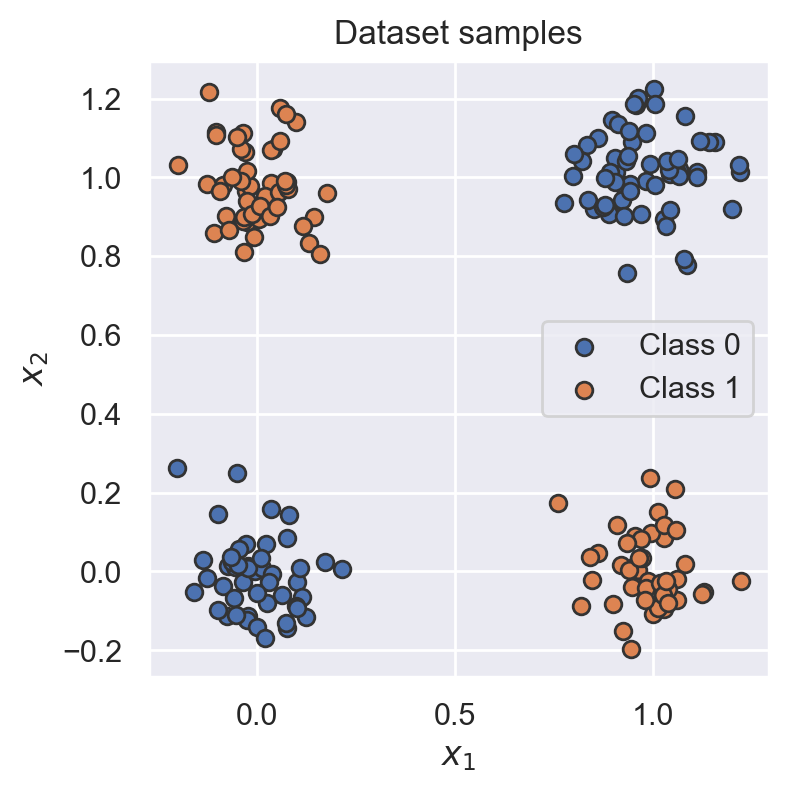

In [70]:
%config InlineBackend.figure_format = 'retina'  # Для высококачественного отображения

visualize_samples(dataset.data, dataset.label)
plt.show()

#### Класс загрузчика данных

Класс `torch.utils.data.DataLoader` представляет собой итераор Python по набору данных с поддержкой автоматической пакетной обработки, многопроцессной загрузки данных и т.д. Загрузчик данных взаимодействует с набором данных с помощью функции `__getitem__` и компонует свои выходные данные в виде тензоров по первому измерению, формируя батч.
В отличие от класса набора данных, нам обычно не нужно определять собственный класс загрузчика данных, а можно просто создать его объект с набором данных в качестве входных данных. Кроме того, мы можем настроить наш загрузчик данных со следующими входными аргументами (только некоторые из них, полный список см. [здесь](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)) :

* `batch_size`: количество образцов, которые необходимо сложить в одну партию.
* `shuffle`: если True, данные возвращаются в случайном порядке. Это важно во время обучения для соблюдения стохастичности.
* `num_workers`: количество подпроцессов, используемых для загрузки данных. Значение по умолчанию, 0, означает, что данные будут загружены в основном процессе, что может замедлить обучение в случае наборов данных, где загрузка  занимает значительное время (например, большие изображения).
Для малых наборов данных, таких как наш, 0 рабочих обычно работают быстрее.
* `pin_memory`: Если установлено значение True, загрузчик данных скопирует Tensor в закрепленную память CUDA, прежде чем вернуть их. Это позволит сэкономить  время для больших датасетов на графических процессорах. Обычно это хорошая практика для использования обучающего набора, но не обязательно для валидации или тестирования с целью экономии памяти на графическом процессоре.
* `drop_last`: Если установлено значение True, последний пакет удаляется, если он меньше указанного размера пакета. Это происходит, когда размер набора данных не кратен размеру пакета. Потенциально полезно во время обучения поддерживать постоянный размер батча.

Давайте создадим простой загрузчик данных ниже:

In [71]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [72]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.1234, -0.1165],
        [ 0.0792,  0.9715],
        [ 0.8783,  0.9975],
        [ 0.1710,  0.0249],
        [ 0.0331,  0.9009],
        [-0.0466,  0.0162],
        [ 1.0414,  1.0188],
        [ 1.0256, -0.0602]])
Data labels torch.Size([8]) 
 tensor([0, 1, 0, 0, 1, 0, 0, 1])


### Оптимизация

 В ходе обучения мы выполним следующие действия:

1. Получение пакета (батч/пачка) из загрузчика данных
2. Вычисление предсказаний модели для батча.
3. Вычисление функции потерь (лосса) на основе разницы между полученным предсказанием и исходными метками.
4. Обратное распространение ошибки: расчет градиентов для каждого параметра с учетом потерь.
5. Обновление параметров модели.

Мы увидели, как можно выполнить шаги 1, 2 и 4 в PyTorch. Теперь мы рассмотрим шаги 3 и 5.

#### Функция потерь

Мы можем рассчитать потери для пакета, просто выполнив несколько тензорных операций, поскольку они автоматически добавляются в граф вычислений. Например, для двоичной классификации мы можем использовать двоичную перекрестную энтропию (Binary Cross Entropy BCE , которая определяется следующим образом:


$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

где $y$ — наши метки, а $x$ — наши предсказания, оба в диапазоне $[0,1]$. PyTorch предоставляет список предопределенных функций потерь, которые мы можем использовать (полный список см. [здесь](https://pytorch.org/docs/stable/nn.html#loss-functions). Например, для BCE PyTorch имеет два модуля: `nn.BCELoss`(), `nn.BCEWithLogitsLoss()`. В то время как `nn.BCELoss` ожидает, что входные данные $x$ будут находиться в диапазоне $[0,1]$, т.е. выходные данные сигмоида, `nn.BCEWithLogitsLoss` объединяет слой с сигмоидой и BCE в одном классе. Эта версия численно более стабильна, чем использование простой сигмоиды с последующей потерей BCE из-за логарифмов, применяемых в функции потерь. Следовательно, рекомендуется использовать функции потерь, применяемые к «логитам», где это возможно (не забудьте в этом случае не применять сигмовидную форму к выходным данным модели!). Поэтому для нашей модели, определенной выше, мы используем модуль nn.BCEWithLogitsLoss.

In [73]:
loss_module = nn.BCEWithLogitsLoss()

#### Стохастический градиентный спуск

Для обновления параметров PyTorch предоставляет пакет `torch.optim`, в котором реализовано большинство популярных оптимизаторов. В данной работе будем использовать типовой стохастический градиентный спуск: `torch.optim.SGD`.

Стохастический градиентный спуск обновляет параметры, умножая градиенты на небольшую константу, называемую скоростью обучения, и вычитая их из параметров/весов  минимизируя целевую функцию потерь. Поэтому мы потихоньку движемся в направлении минимизации потерь.

Значение скорости обучения по умолчанию для такой небольшой сети, как наша, составляет 0,1.

In [74]:
# Входные параметры оптимизатора - параметры модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Оптимизатор предоставляет две полезные функции: `optimizer.step()` и `optimizer.zero_grad()`. Функция step обновляет параметры на основе градиентов, как описано выше. Функция optimizer.zero_grad() устанавливает градиенты всех параметров в ноль.
Хотя на первый взгляд эта функция кажется менее актуальной, она является важным предварительным шагом перед выполнением обратного распространения ошибки. Если мы вызовем функцию `backward` при потере, в то время как градиенты параметров не равны нулю по сравнению с предыдущим пакетом, новые градиенты фактически будут добавлены к предыдущим, а не перезапишут их. Это сделано потому, что параметр может встречаться в графе вычислений несколько раз, и в этом случае нам нужно суммировать градиенты, а не заменять их. Следовательно,необхоимо вызвать `optimizer.zero_grad()` перед расчетом градиентов батча.

### Обучение

Наконец, мы готовы обучать нашу модель. В качестве первого шага мы создаем немного больший набор данных и указываем загрузчик данных с большим размером пакета.

In [75]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

Теперь мы можем написать небольшую обучающую функцию.
Помните наши пять шагов: загрузка батча, получение предсказаний, подсчет потерь, обратное распространение ошибки и обновление. Кроме того, нам необходимо передать все данные и параметры модели на выбранное нами устройство (графический процессор, если доступен). Для нашей примитивной нейронной сети передача данных в графический процессор на самом деле занимает гораздо больше времени, чем мы могли бы сэкономить, выполняя операцию на GPU. Для больших сетей время связи значительно меньше фактического времени работы, поэтому в этих случаях графический процессор имеет решающее значение. Тем не менее, для практики мы передадим данные в графический процессор.

In [77]:
# Отправляем модель на GPU
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

Переводим модель в режим обучения. Это делается путем вызова `model.train()`. Существуют определенные модули, которым во время обучения необходимо выполнять действия, отличные чем во время тестирования (например, BatchNorm и Dropout), и мы можем переключаться между ними с помощью `model.train()` и `model.eval()`.

In [81]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Переводим в режим обучения
    model.train()

    # Цикл обучения
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Шаг 1: Отправим входные данные на устройство (если используем GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Шаг 2: Запускаем модель на входных данных
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Выход здесь [Batch size, 1], нам необходимо [Batch size]

            ## Шаг 3: Считаем лосс
            loss = loss_module(preds, data_labels.float())

            ## Шаг 4: Осуществляем обратное распространение
            # Перед подсчетом градиентов зануляем
            optimizer.zero_grad()

            loss.backward()

            ## Шаг 5: Обновляем параметры
            optimizer.step()

#### Сохранение модели

После завершения обучения модели мы сохраняем ее на диск, чтобы позже загрузить те же веса. Для этого мы извлекаем из модели так называемый `state_dict`, который содержит все обучаемые параметры.

В нашем случае словарь содержит следующее:

In [82]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict({'linear1.weight': tensor([[-0.3282, -0.6424],
        [-0.4784, -0.5785],
        [ 0.5566,  0.3675],
        [-0.3071,  0.0528]]), 'linear1.bias': tensor([-0.3925, -0.1957, -0.5091, -0.1892]), 'linear2.weight': tensor([[ 0.0327,  0.3970,  0.1173, -0.2440]]), 'linear2.bias': tensor([0.3572])})


Чтобы загрузить словарь состояний используем `torch.save`:

In [83]:
# torch.save(object, filename). Для filename может быть использованю любое расширение

torch.save(state_dict, "our_model.tar")

Чтобы загрузить модель из словаря состояния, мы используем функцию `torch.load` для загрузки с диска и функцию модуля `load_state_dict` для перезаписи наших параметров новыми значениями:

In [85]:
# Грузим с диска
state_dict = torch.load("our_model.tar", weights_only=True)

# Создаем новую модель и загружаем состояние
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Проверяем что параметры одинаковые
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict({'linear1.weight': tensor([[-0.3282, -0.6424],
        [-0.4784, -0.5785],
        [ 0.5566,  0.3675],
        [-0.3071,  0.0528]]), 'linear1.bias': tensor([-0.3925, -0.1957, -0.5091, -0.1892]), 'linear2.weight': tensor([[ 0.0327,  0.3970,  0.1173, -0.2440]]), 'linear2.bias': tensor([0.3572])})

Loaded model
 OrderedDict({'linear1.weight': tensor([[-0.3282, -0.6424],
        [-0.4784, -0.5785],
        [ 0.5566,  0.3675],
        [-0.3071,  0.0528]]), 'linear1.bias': tensor([-0.3925, -0.1957, -0.5091, -0.1892]), 'linear2.weight': tensor([[ 0.0327,  0.3970,  0.1173, -0.2440]]), 'linear2.bias': tensor([0.3572])})



---

 Подробный туториал про сохранение и загрузку моделй можно почитать [здесь](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

---



### Оценка

После того как модель обучена, пришло время оценить ее тестовом наборе. Поскольку наш набор данных состоит из случайно сгенерированных точек данных, необходимо сначала создать тестовый набор с соответствующим загрузчиком данных.

In [86]:
test_dataset = XORDataset(size=500)
# drop_last -> false параметр указывающий на то что последный батч будет обработан несмотря на то что его размерность меньше 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

В качестве метрики мы будем использовать точность, которая рассчитывается следующим образом:

$$acc = \frac{\#\text{правильные предсказания}}{\#\text{все прдсказания}} = \frac{TP+TN}{TP+TN+FP+FN}$$

где TP — истинно положительные результаты, TN — истинно отрицательные результаты, FP — ложноположительные результаты и FN — ложноотрицательные результаты.

При оценке модели деактивируем граф вычислений, используя `with torch.no_grad(): ...`.

In [87]:
def eval_model(model, data_loader):
    model.eval() # Устанавливаем мадель в режим тестирования
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Выключаем градиенты
        for data_inputs, data_labels in data_loader:

            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Нелинейность/Сигмоида для отображения в диапазон 0 1
            pred_labels = (preds >= 0.5).long() # Бинаризация предсказаний в формат 0 и 1

            # (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            # Сохраняем предсказания для подсчета целевой метрики
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [88]:
eval_model(model, test_data_loader)

Accuracy of the model: 49.80%


Если мы правильно обучили нашу модель, мы должны увидеть точность, близкую к 100%. Однако этот сценарий возможен только благодаря изначально простой задаче, и, к сожалению, на тестовых наборах более сложных задач результат редко бывает подобным.

#### Визуализация разделяющей поверхности

Чтобы отобразить то, чему научилась наша модель, мы можем выполнить прогноз для каждой точки данных в диапазоне $[-0,5, 1,5]$ и визуализировать пердсказанный класс, как показано на примере рисунка в начале этого раздела.

Это демонстрирует, построена разделяющая поверхность, и какие точки будут классифицироваться как $0$, а какие — как $1$.

Таким образом, получаем фоновое изображение синего (класс 0) и оранжевого (класс 1) цвета.

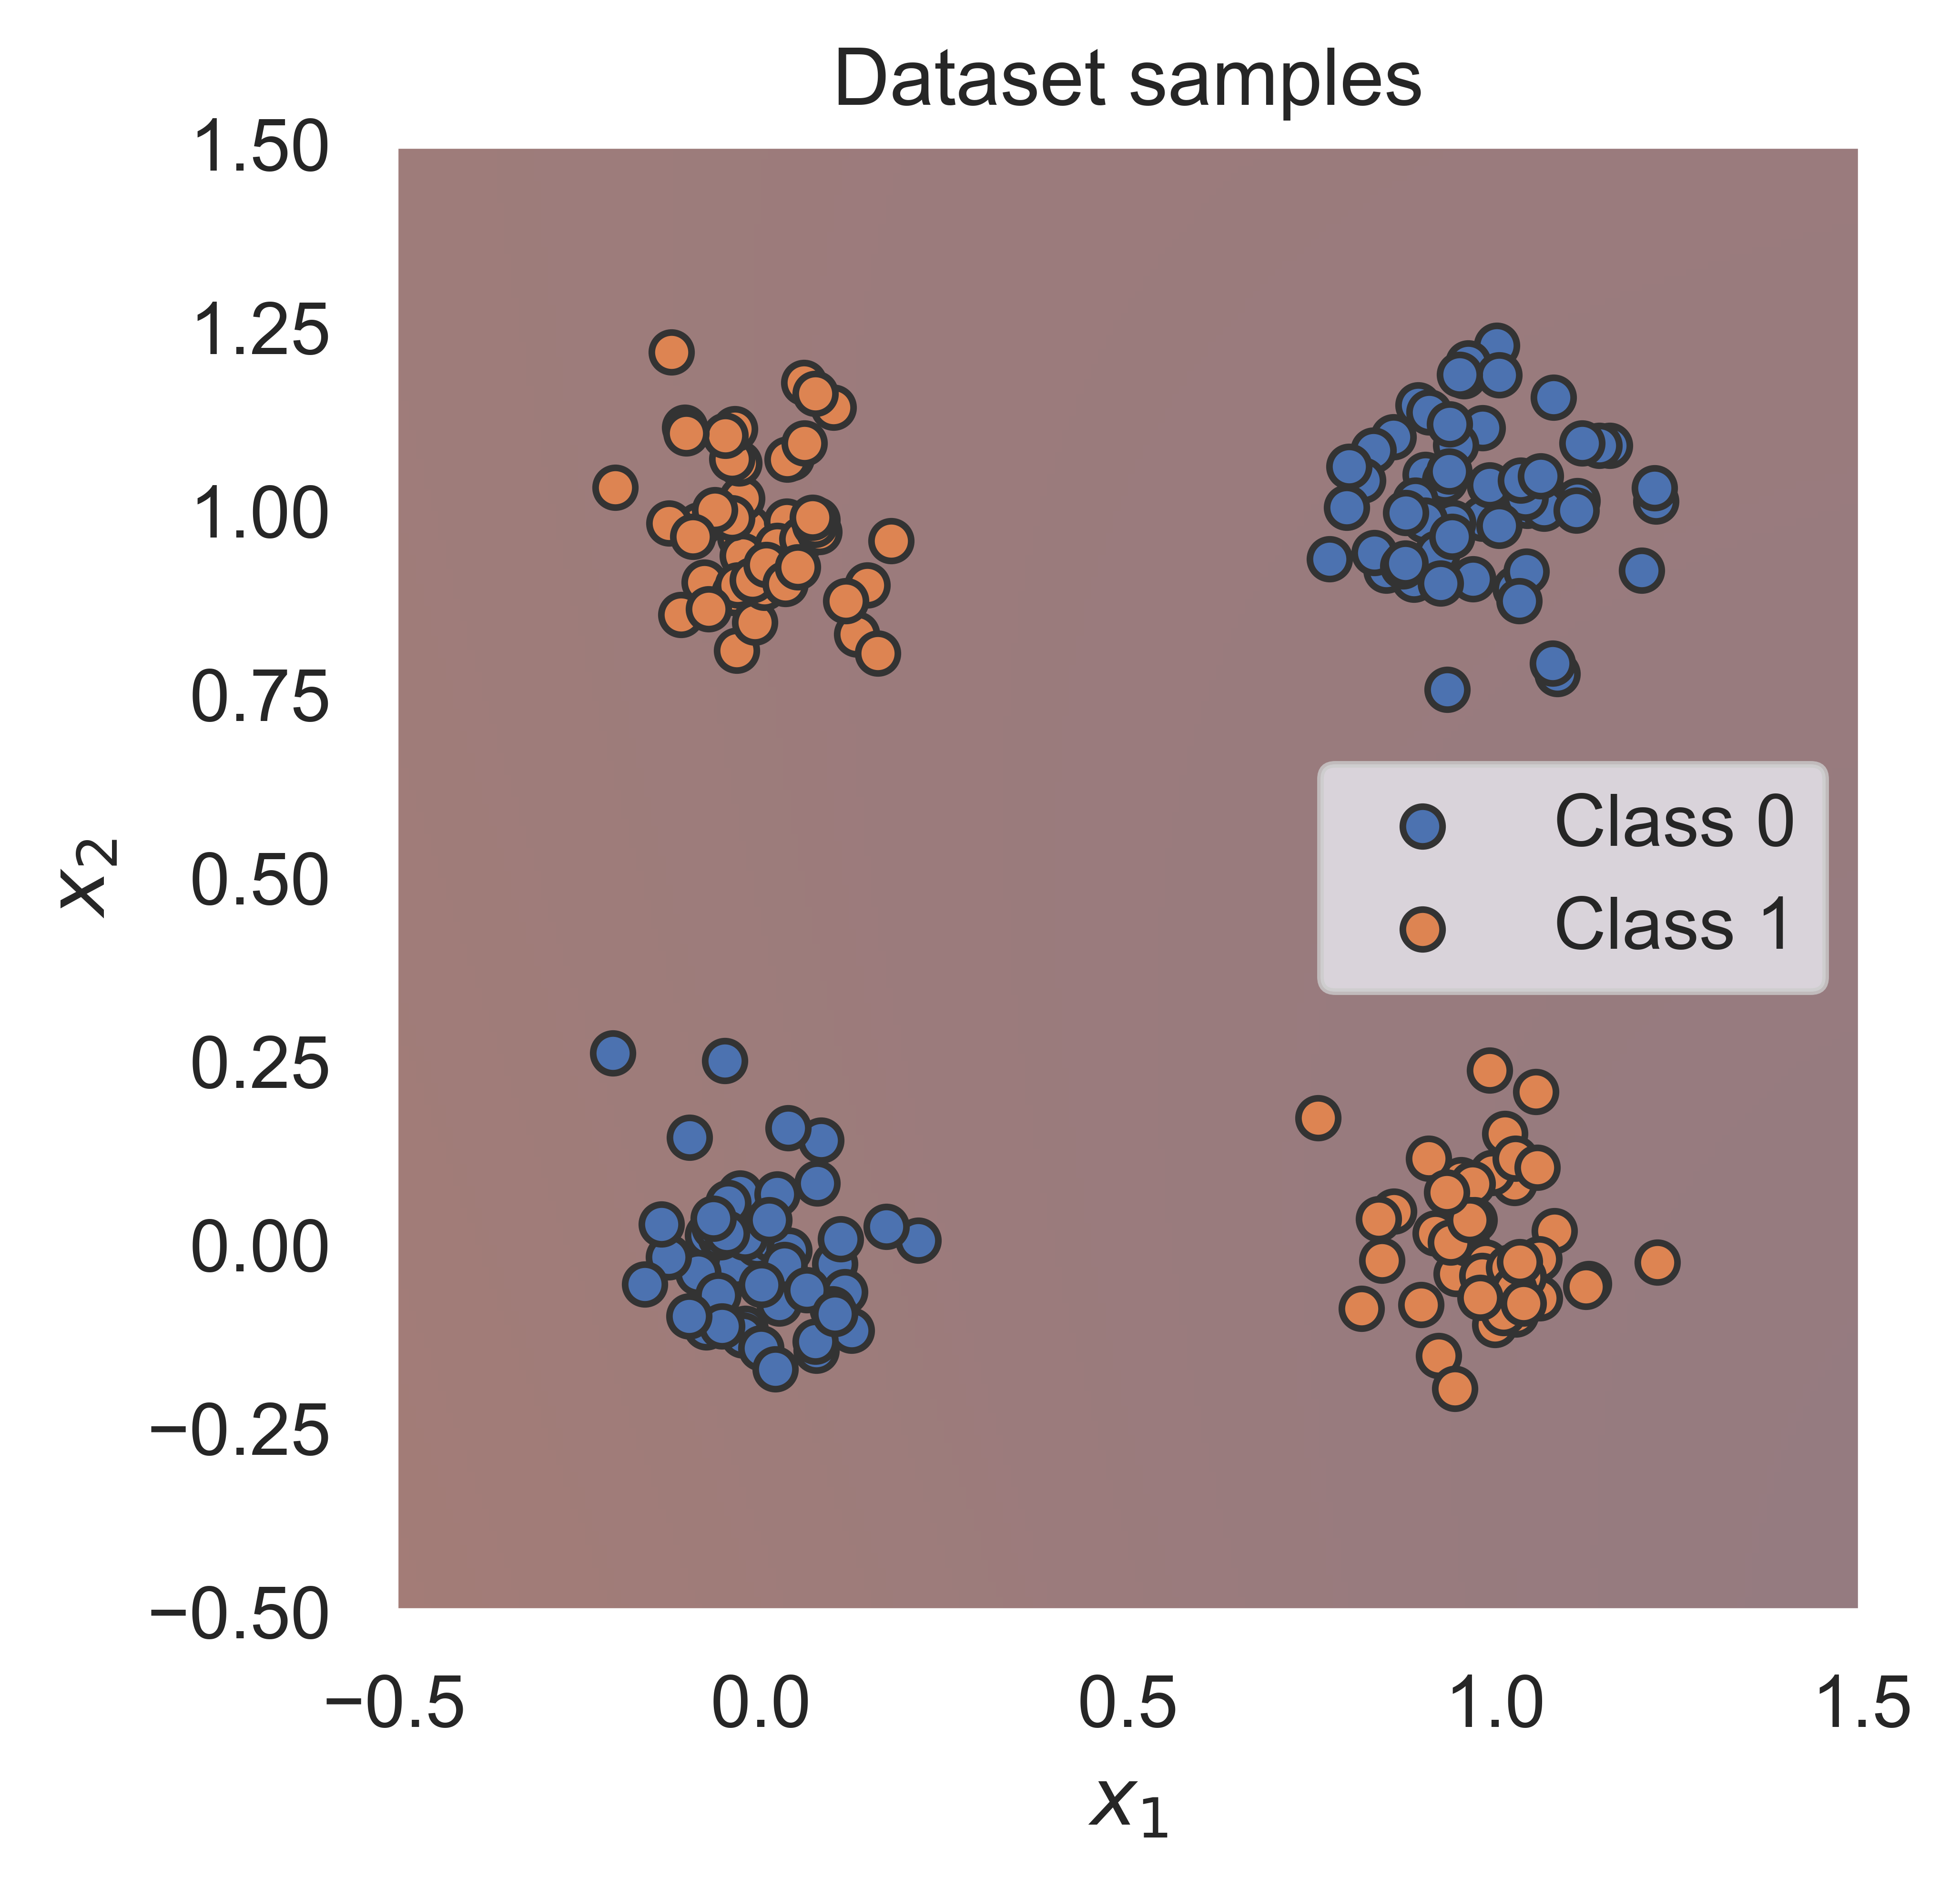

In [89]:
@torch.no_grad() # декоратор, то же что и "with torch.no_grad(): ..." над функцией.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Используем все чему мы научились выше
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid функция как в  numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]
    output_image = output_image.cpu().numpy()  # Конвертируем в numpy массив. Это работает только для тензоров на CPU, следовательно oтправляем на CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

### Использование TensorBoard

TensorBoard — это инструмент для логгирования и визуализации, использующийся для обучения моделей глубокого обучения. Хотя TensorBoard изначально был опубликован для TensorFlow, он также интегрирован в PyTorch, что позволяет нам легко его использовать.

Импортируем соответствующие библиотеки ниже.

In [91]:
# Импортируем TensorBoard logger из PyTorch
from torch.utils.tensorboard import SummaryWriter

# загружаем расширение для Jupyter Notebook
%load_ext tensorboard

Последняя строка необходима, если необходимо запустить TensorBoard непосредственно в Jupyter Notebook. В другом случае можно запустить TensorBoard из терминала.

API TensorBoard PyTorch достаточно прост в использовании. Начиаем работу с создания нового объекта `writer = SummaryWriter(...)`, где указываем каталог, в котором должен быть сохранен файл журнала. С помощью этого объекта мы можем логгировать различные аспекты нашей модели, вызывая `writer.add_...`. Например, мы можем визуализировать график вычислений с помощью функции `Write.add_graph` или добавить скалярное значение, такое как лосс, с помощью `Writer.add_scalar`.

Адаптируем нашу первоначальную функцию обучения, добавив ниже логгер TensorBoard.

In [92]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Создаем TB логгер
    writer = SummaryWriter(logging_dir)
    model_plotted = False

    # Переводим модель в режим обучения
    model.train()

    # Цикл обучения
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:

            ## Шаг 1: Отправим входные данные на устройство (если используем GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Для первого батча визуализируем граф вычсисдений в TB
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True

            ## Шаг 2: Запускаем модель на входных данных
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Выход здесь [Batch size, 1], нам необходимо [Batch size]

            ## Шаг 3: Вычисляем функцию потерь
            loss = loss_module(preds, data_labels.float())

            ## Шаг 4: Осуществляем обратный проход вычислений
            # перед подстчетом градиентов мы должны убедиться что все они занулены
            optimizer.zero_grad()
            loss.backward()

            ## Шаг 5: Обновляем параметры
            optimizer.step()

            ## Шаг 6: Аккумулируем лосс
            epoch_loss += loss.item()

        # Отправляем усредненное значение функции потерь в TB
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)


        # Рендерим каждую 10ю эпоху
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)

    writer.close()



Используем этот способ чтобы обучить модель по аналогии, но в этот раз с новой моделью и оптимизатором.

In [93]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_data_loader, loss_module, val_dataset=dataset)

  0%|          | 0/100 [00:00<?, ?it/s]

Файл TensorBoard в папке runs/our_experiment теперь содержит кривую потерь, график вычислений нашей сети и визуализацию полученных пердсказаний за определенное количество эпох.

Чтобы запустить визуализацю TensorBoard, просто выполните следующую инструкцию:

In [95]:
%tensorboard --logdir runs/our_experiment

Reusing TensorBoard on port 6006 (pid 22432), started 0:00:26 ago. (Use '!kill 22432' to kill it.)



Визуализации (в т.ч. с использованеим TensorBoard) могут помочь выявить возможные проблемы с вашей моделью и выявить такие ситуации, как переобучение.

Вы также можете отслеживать ход обучения во время обучения модели, поскольку регистратор автоматически записывает все добавленное к нему в файл журнала.

# Полезные ссылки

1.   [DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)


2.   [Руководство TensorBoard](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)


